<a href="https://colab.research.google.com/github/karine94/Projects-Cluster/blob/main/k_means%2C_k_means%2B%2B_e_heur%C3%ADstica_para_escolha_do_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Inicialização do K Means++

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

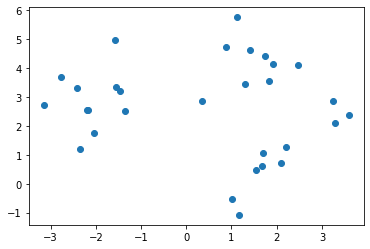

In [ ]:
#make_blobs constrói gráficos muito apropriados  para rodarmos o k-means
X, y = make_blobs(n_samples=30, centers=3, random_state=0) #random_state: não é pra ser randomico agora e sempre reinicializar da mesma maneira(serve para fns de teste mesmo)
plt.scatter(X[:,0], X[:, 1])

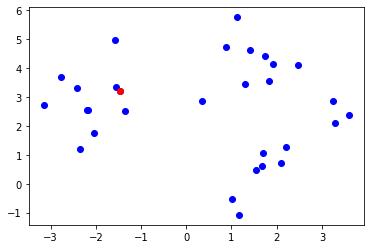

In [ ]:
k = 3
num_samples, num_dimensions = X.shape

#escolha do primeiro centróide
np.random.seed(0)
centroides = np.zeros((k, num_dimensions)) #os 3 centroides começam com zero
rand_index = np.random.choice(num_samples) #vai me dar 1 valor entre 0 e 29, que são os indices de todos os 30 pontos que existem
centroides[0] = X[rand_index]  #aqui eu sorteio 1 deles e ele vai ser meu primeiro centróide

plt.scatter(X[:, 0], X[:, 1], color='blue')
plt.scatter(centroides[0][0], centroides[0][1], color='red')
plt.show()

In [ ]:
#Computa todas as distâncias do primeiro centróide para todas as amostras
distances_to_centroids  = pairwise_distances(X, [centroides[0]], metric= 'euclidean').flatten()
distances_to_centroids 

array([1.7409429 , 0.15750784, 0.99215179, 1.59150835, 4.15385438,
       4.02766084, 5.04238964, 0.96568179, 4.08140553, 0.96627334,
       1.75762294, 0.71293257, 0.        , 4.87638081, 2.7592718 ,
       3.51266412, 4.08375103, 3.61938806, 2.21125591, 3.3186864 ,
       5.12004454, 4.35696346, 3.21023203, 2.77075145, 4.72100626,
       3.83765893, 1.84721188, 4.48268396, 1.4022226 , 3.41724106])

Probabilidade de cada amostra ser escolhida:
[9.64158448e-03 7.89193848e-05 3.13137873e-03 8.05744220e-03
 5.48885667e-02 5.16042109e-02 8.08820517e-02 2.96652111e-03
 5.29906020e-02 2.97015662e-03 9.82722229e-03 1.61687431e-03
 0.00000000e+00 7.56440170e-02 2.42196756e-02 3.92511699e-02
 5.30515247e-02 4.16725096e-02 1.55545471e-02 3.50357796e-02
 8.33924694e-02 6.03875196e-02 3.27832650e-02 2.44216215e-02
 7.09003710e-02 4.68502706e-02 1.08545740e-02 6.39227718e-02
 6.25479791e-03 3.71475852e-02]


Cluster escolhido: [20]


Distancia de cada amostra ao centróide 0 :
[1.7409429  0.15750784 0.99215179 1.59150835 4.15385438 4.02766084
 5.04238964 0.96568179 4.08140553 0.96627334 1.75762294 0.71293257
 0.         4.87638081 2.7592718  3.51266412 4.08375103 3.61938806
 2.21125591 3.3186864  5.12004454 4.35696346 3.21023203 2.77075145
 4.72100626 3.83765893 1.84721188 4.48268396 1.4022226  3.41724106]


Distancia de cada amostra ao centróide 1 :
[5.77796672 5.23551652 5.79057222 5.66089591

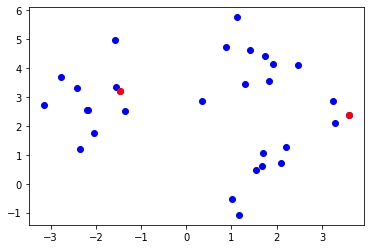



Probabilidade de cada amostra ser escolhida:
[0.02120093 0.00017354 0.0068856  0.01771755 0.02160836 0.02971259
 0.12424957 0.0065231  0.05462949 0.00653109 0.02160912 0.00355535
 0.         0.00113862 0.04516116 0.04161229 0.0477448  0.09163388
 0.03420297 0.03133933 0.         0.03466261 0.06893361 0.05370082
 0.00244606 0.03680049 0.02386817 0.10500688 0.0137537  0.05359831]


Cluster escolhido: [27]


Distancia de cada amostra ao centróide 1 :
[1.7409429  0.15750784 0.99215179 1.59150835 1.75759202 2.06099719
 4.21458253 0.96568179 2.79460676 0.96627334 1.75762294 0.71293257
 0.         0.40345639 2.54091231 2.43903432 2.61258334 3.61938806
 2.21125591 2.11666425 0.         2.22606469 3.13922648 2.77075145
 0.5913443  2.29368584 1.84721188 3.87450301 1.4022226  2.76810576]


Distancia de cada amostra ao centróide 2 :
[6.05820969 4.63989707 4.44629652 3.79134904 2.16376204 4.84723769
 0.58336837 5.13863971 1.12010149 4.41665324 5.25534247 3.84497792
 4.48268396 3.47420473 3.982087

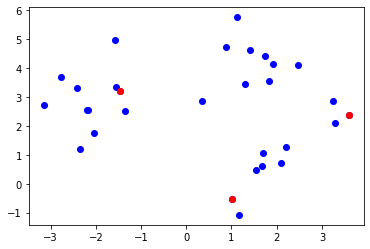

In [ ]:
#Hora de computadar os outros dois centróides :)
for i in range(1, k):
  #verificando qua sera a amostra escolhida para ser o centroide 1
   prob = distances_to_centroids ** 2
   rand_index = np.random.choice(num_samples, size = 1, p = prob / np.sum(prob))
   print("Probabilidade de cada amostra ser escolhida:")
   print(prob / np.sum(prob))
   print("\n")
   print("Cluster escolhido:", rand_index)
   print("\n")
   #guardando o valor do centroide 1, pois o zero já foi escolhido lá em cima
   centroides[i] = X[rand_index]

#computando a distância das amostras em relação ao centróide 1
   distances_new = pairwise_distances(X, [centroides[i]], metric = 'euclidean').flatten()
   print("Distancia de cada amostra ao centróide", i - 1, ':')
   print(distances_to_centroids)
   print("\n")
   print("Distancia de cada amostra ao centróide", i, ':')
   print(distances_new)

#verificando as distancias de cada amostra em relação ao centroide 0 e 1
#para que as amostras se enquadrem nos centróides em que possuem menos distância
#o vstack monta uma pilha das amostra até o cent. 0 e das amostras ate o cent. 1
   distances_to_centroids = np.min(np.vstack((distances_to_centroids, distances_new)), axis = 0)
   print("\n")
   print("Distancias atualizadas:")
   print(distances_to_centroids)
   print("\n")
   plt.scatter(X[:, 0], X[:, 1], color='blue')
   for j in range(0, i + 1):
     plt.scatter(centroides[j,0], centroides[j,1], color='red')
   plt.show()
   print("\n")